# Plot Power Spectra

Power spectra are used to analyze the average frequency content across signals in an RF image such as that produced by a transducer. This example relies on `scipy` and `matplotlib` to generate the power spectral density plot for sample RF data.

In [ ]:
import sys
!{sys.executable} -m pip install itk matplotlib scipy numpy

In [2]:
import os

import itk
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

## Load Data

In [3]:
RF_IMAGE_PATH = './MouseLiverRF.mha'
SAMPLING_FREQUENCY = 60e6 # Hz

In [4]:
assert os.path.exists(RF_IMAGE_PATH)
rf_image = itk.imread(RF_IMAGE_PATH)
rf_array = itk.array_view_from_image(rf_image)
print(rf_array.shape)

(4, 128, 1536)


## Plot Power Spectral Density

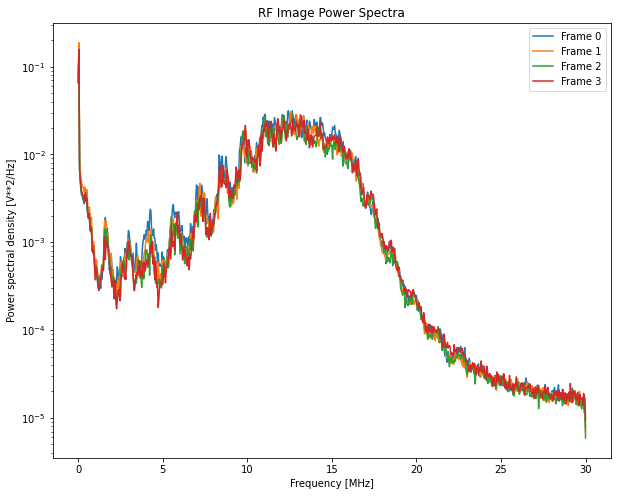

In [5]:
plt.figure(1, figsize=(10,8))

for frame_idx in range(rf_image.shape[0]):
    arr = rf_array[frame_idx,:,:]
    freq, Pxx = signal.periodogram(arr,
                                   SAMPLING_FREQUENCY,
                                   window='hamming',
                                   detrend='linear',
                                   axis=1)
    # Take mean spectra across lateral dimension
    Pxx = np.mean(Pxx,0)
    plt.semilogy([f / 1e6 for f in freq], Pxx, label=frame_idx)
    
plt.title('RF Image Power Spectra')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power spectral density [V**2/Hz]')
plt.legend([f'Frame {idx}' for idx in range(rf_image.shape[0])],loc='upper right')

os.makedirs('./Output',exist_ok=True)
plt.savefig('./Output/PowerSpectralDensity.png',dpi=300)
plt.show()